# **Ejercicio Semana 4: Procesamiento de imágenes**

Visión por Computador

Ingeniería Agronómica

Monica Paola Vargas Tirado




#**Cambiar el color de fondo de la imagen**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

array([[228, 228, 228, ..., 240, 240, 240],
       [228, 228, 228, ..., 240, 240, 240],
       [228, 228, 228, ..., 240, 240, 240],
       ...,
       [240, 241, 241, ..., 247, 247, 247],
       [240, 241, 241, ..., 247, 247, 247],
       [240, 241, 241, ..., 248, 247, 247]], dtype=uint8)
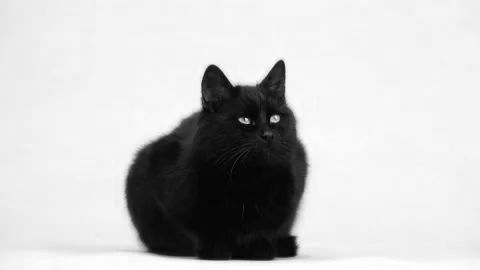

In [ ]:
# El orden de los canales es: BGR
image = cv2.imread('/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/cat.jpg')
green = image[:,:,1]
green

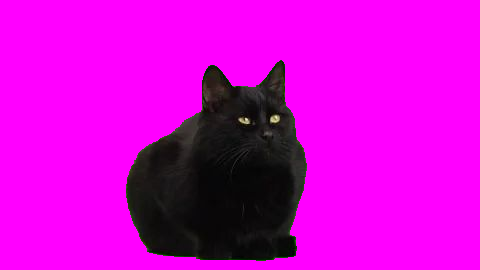

In [ ]:
#Crear una máscara del fondo verde
lower_bound = np.array([0, 100, 0])
upper_bound = np.array([130, 255, 220])
mask = cv2.inRange(image, lower_bound, upper_bound)

# Aplicar una operación morfológica de apertura para eliminar pequeños puntos verdes
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Crear una imagen de fondo morado del mismo tamaño que la imagen original
purple_background = np.ones_like(image) * [255, 0, 255]

# Copiar el fondo morado en la imagen original donde la máscara es negra
result = np.where(mask[:, :, None] == 0, image, purple_background)

# Mostrar la imagen resultante
cv2_imshow(result)



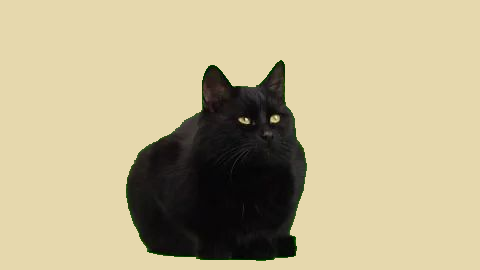

In [ ]:
#Crear una máscara del fondo verde
lower_bound = np.array([0, 100, 0])
upper_bound = np.array([130, 255, 220])
mask = cv2.inRange(image, lower_bound, upper_bound)

# Aplicar una operación morfológica de apertura para eliminar pequeños puntos verdes
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Crear una imagen de fondo beige del mismo tamaño que la imagen original
beige_background = np.ones_like(image) * [173, 216, 230]

# Copiar el fondo morado en la imagen original donde la máscara es negra
result = np.where(mask[:, :, None] == 0, image, beige_background)

# Mostrar la imagen resultante
cv2_imshow(result)


# **Ajustar Brillo y Contraste**

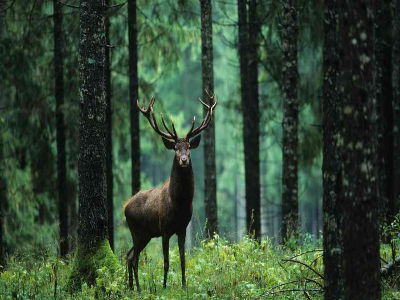

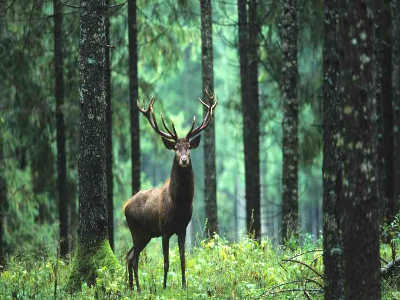

In [ ]:
# Leer la imagen
image = cv2.imread('/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Bosque.jpg')

# Ajustar el brillo y contraste
alpha = 1.2  # Factor de contraste
beta = 15  # Valor de brillo

adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Redimensionar la imagen para que sea más pequeña
width, height = 400, 300  # Tamaño deseado
resized_image = cv2.resize(adjusted_image, (width, height))
image_o = cv2.resize(image, (width, height))

# Mostrar la imagen original y la imagen ajustada
cv2_imshow(image_o)
cv2_imshow(resized_image)

# **Image matting con image en PNG**

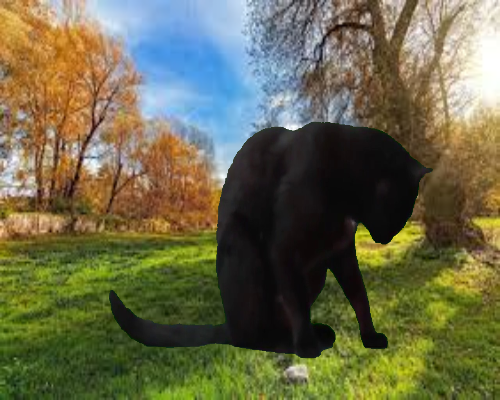

In [ ]:
 #Leer la imagen del gato y del nuevo fondo
img_cat = cv2.imread('/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Cat_2.jpg')
img_background = cv2.imread('/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Fondo.jpg')

# Verificar las dimensiones de las imágenes
img_background = cv2.resize(img_background, (img_cat.shape[1], img_cat.shape[0]))

# Definir el rango de colores de verde en HSV
lower_green = np.array([15, 90, 50])
upper_green = np.array([95, 255, 255])

# Convertir la imagen del gato a HSV
hsv = cv2.cvtColor(img_cat, cv2.COLOR_BGR2HSV)

# Crear una máscara para el color verde
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara
mask_inv = cv2.bitwise_not(mask)

# Aplicar la máscara a la imagen del gato
img_cat_fg = cv2.bitwise_and(img_cat, img_cat, mask=mask_inv)

# Aplicar la máscara inversa al fondo
img_background_fg = cv2.bitwise_and(img_background, img_background, mask=mask)

# Fusionar el gato con el nuevo fondo
result = cv2.add(img_cat_fg, img_background_fg)

# Redimensionar la imagen para que sea más pequeña
width, height = 500, 400  # Tamaño deseado
resized_image = cv2.resize(result, (width, height))

cv2_imshow(resized_image)

# **Operador Sobel**

## Dirección Y

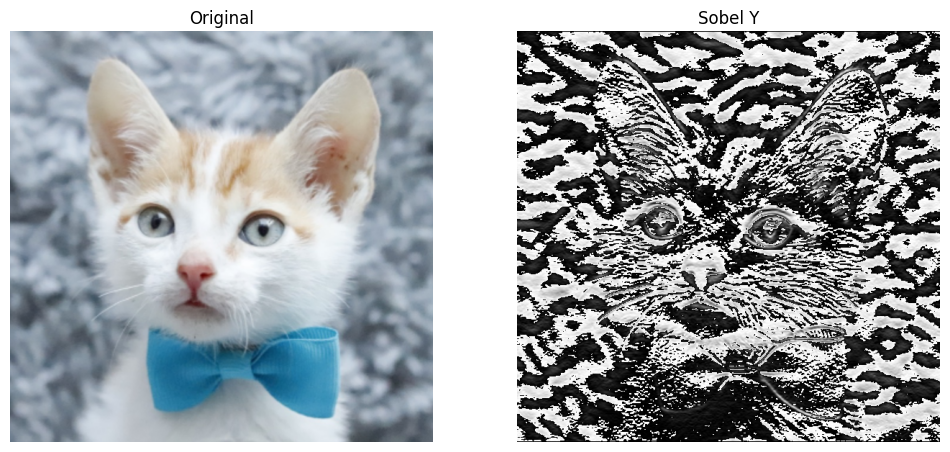

In [ ]:
# Cargar la imagen
original_image = cv2.imread("/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Cat4.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Escalar la imagen en el rango [0, 1]
gray_image = gray_image / 255.0

# Definir el filtro Sobel en dirección Y
sobel_y_filter = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Aplicar el filtro Sobel en dirección Y
filtered_image = cv2.filter2D(gray_image, -1, sobel_y_filter)

# Escalar los valores de la imagen filtrada al rango [0, 255]
filtered_image = np.uint8(filtered_image * 255.0)

# Mostrar la imagen resultante

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')
plt.show()

## Dirección X

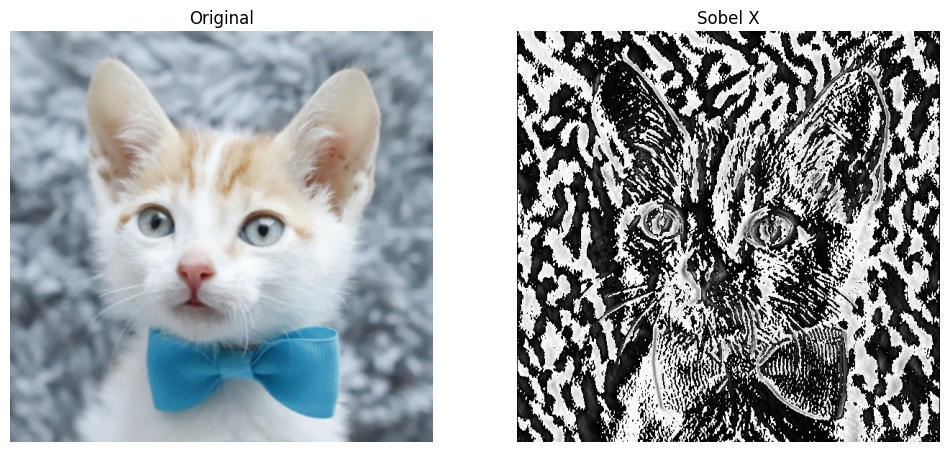

In [ ]:
# Cargar la imagen
original_image = cv2.imread("/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Cat4.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Escalar la imagen en el rango [0, 1]
gray_image = gray_image / 255.0

# Definir el filtro Sobel en dirección X
sobel_x_filter = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Aplicar el filtro Sobel en dirección X
filtered_image = cv2.filter2D(gray_image, -1, sobel_x_filter)

# Escalar los valores de la imagen filtrada al rango [0, 255]
filtered_image = np.uint8(filtered_image * 255.0)

# Mostrar la imagen resultante
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Sobel X")
plt.axis('off')
plt.show()

## Magnitud del gradiente

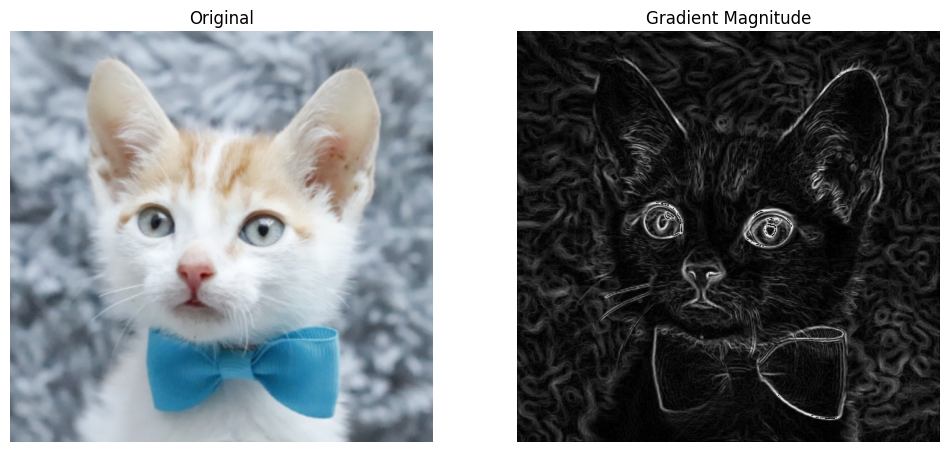

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
original_image = cv2.imread("/content/drive/MyDrive/UNIVERSIDAD EAFIT/VISION POR COMPUTADOR/EJERCICIOS/Dataset/Cat4.png")

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Escalar la imagen en el rango [0, 1]
gray_image = gray_image / 255.0

# Definir el filtro Sobel en dirección X
sobel_x_filter = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Definir el filtro Sobel en dirección Y
sobel_y_filter = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Aplicar los filtros Sobel en dirección X y en dirección Y
filtered_image_x = cv2.filter2D(gray_image, -1, sobel_x_filter)
filtered_image_y = cv2.filter2D(gray_image, -1, sobel_y_filter)

# Calcular la magnitud del gradiente
magnitude_image = np.sqrt(filtered_image_x ** 2 + filtered_image_y ** 2)

# Escalar los valores de la imagen de magnitud del gradiente al rango [0, 255]
magnitude_image = np.uint8(magnitude_image * 255.0)

# Mostrar la imagen original y la imagen resultante de la magnitud del gradiente
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_image, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')
plt.show()